## ***Best Streaming Service Analysis***

Import necessary libraries

In [1]:
!pip install plotly 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.offline as pyo
#set to work in offline

pyo.init_notebook_mode()

import plotly.express as px

%matplotlib inline

Output hidden; open in https://colab.research.google.com to view.

In [4]:
df=pd.read_csv("/content/moviestreams.csv")

df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [5]:
df.shape

(16744, 17)

In [6]:
cols=df.columns.tolist()
cols

['Unnamed: 0',
 'ID',
 'Title',
 'Year',
 'Age',
 'IMDb',
 'Rotten Tomatoes',
 'Netflix',
 'Hulu',
 'Prime Video',
 'Disney+',
 'Type',
 'Directors',
 'Genres',
 'Country',
 'Language',
 'Runtime']

In [7]:
df.drop(['Unnamed: 0','ID',],axis=1,inplace=True)

cols=df.columns.tolist()
cols

['Title',
 'Year',
 'Age',
 'IMDb',
 'Rotten Tomatoes',
 'Netflix',
 'Hulu',
 'Prime Video',
 'Disney+',
 'Type',
 'Directors',
 'Genres',
 'Country',
 'Language',
 'Runtime']

## **Check missing values**

Python recognise missing values as **NaN**

In [8]:
df.isna().sum()

Title                  0
Year                   0
Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Directors            726
Genres               275
Country              435
Language             599
Runtime              592
dtype: int64

## Let's remove the '+' sign attached to the values in the Age column.

In [9]:
df.dtypes

Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type                 int64
Directors           object
Genres              object
Country             object
Language            object
Runtime            float64
dtype: object

In [10]:
df['Age']

0        13+
1        18+
2        13+
3         7+
4        18+
        ... 
16739    NaN
16740     7+
16741    NaN
16742    NaN
16743    NaN
Name: Age, Length: 16744, dtype: object

In [11]:
age_map={'18+':18,'7+':7,'13+':13,'All':0,'16+':16}
df['AgeCopy']=df['Age'].map(age_map)
df['AgeCopy']

0        13.0
1        18.0
2        13.0
3         7.0
4        18.0
         ... 
16739     NaN
16740     7.0
16741     NaN
16742     NaN
16743     NaN
Name: AgeCopy, Length: 16744, dtype: float64

 Let's remove the '%' sign attached to the values in the **rottan tomatoes** column.

In [12]:
df['New_Rotten_Tomatoes']=df['Rotten Tomatoes'].str.replace('%','')
#df['New_Rotten_Tomatoes']=df['New_Rotten_Tomatoes'].astype(int)
for i in df['New_Rotten_Tomatoes']:
     if i==str:
      i.astype(int)

## Visualisation

## What is the number of movies for each age group?

In [13]:
df['Age'].value_counts()

18+    3474
7+     1462
13+    1255
all     843
16+     320
Name: Age, dtype: int64

Top 10 langauage in streaming services

In [14]:
df.Language.value_counts()

English                                                                             10955
Hindi                                                                                 503
English,Spanish                                                                       276
Spanish                                                                               267
English,French                                                                        174
                                                                                    ...  
English,German,Hungarian,Romanian                                                       1
English,Spanish,Chinese,Latin                                                           1
English,Danish,Malay,Dutch,Indonesian,Finnish,Luxembourgish,French Sign Language        1
Dutch,French                                                                            1
English,Algonquin                                                                       1
Name: Lang

In [15]:
language=df.Language.value_counts().head(10)
language.index
language.values

array([10955,   503,   276,   267,   174,   166,   163,   155,   151,
          93])

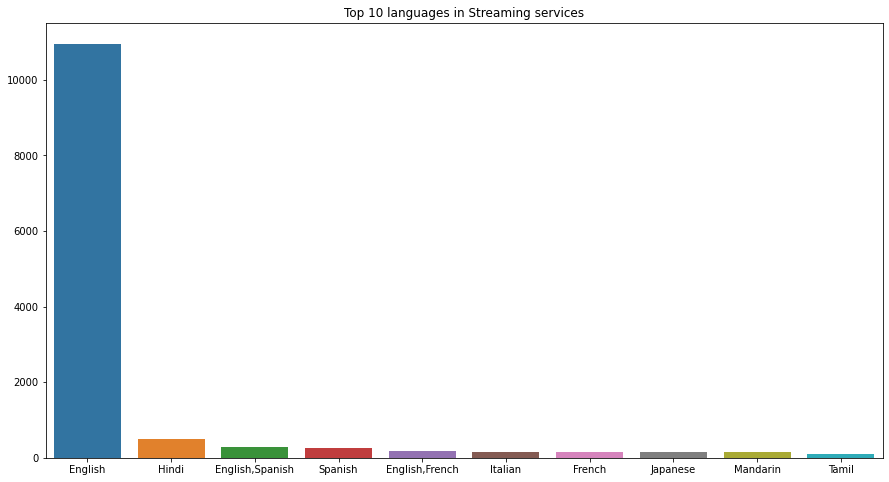

In [16]:
plt.figure(figsize=(15,8))
plt.title("Top 10 languages in Streaming services")
sns.barplot(x=language.index,y=language.values)

In [17]:
from operator import index
from IPython.display import HTML
import plotly.express as px

fig=px.pie(df,
            values=language.values,
            names=language.index,
            title="Top 10 languages in Streaming services",
            height=600)

HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

Number of movies in specific age group in all services

In [18]:
df['Age'].value_counts().index

Index(['18+', '7+', '13+', 'all', '16+'], dtype='object')

In [19]:
from IPython.display import HTML
import plotly.express as px

fig=px.bar(df,
            x=df['Age'].value_counts().index,
            y=df['Age'].value_counts(),
            title="Number of movies in specific age group in all services",
            text=df['Age'].value_counts(),
            height=600)

fig.update_traces(texttemplate='%{text:.2s}',textposition='outside')

HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

Number of movies in specific age group in netflix

In [20]:
from IPython.display import HTML
import plotly.express as px

netflix_df=df[df['Netflix']==1]

fig=px.bar(df,
            x=netflix_df['Age'].value_counts().index,
            y=netflix_df['Age'].value_counts(),
            title="Number of movies in specific age group in netflix",
            text=netflix_df['Age'].value_counts(),
            height=600)

fig.update_traces(marker_color='green',texttemplate='%{text:.2s}',textposition='outside')

HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

Number of movies in specific age group in amazon prime

In [21]:
from IPython.display import HTML
import plotly.express as px

prime_df=df[df['Prime Video']==1]

fig=px.bar(df,
            x=prime_df['Age'].value_counts().index,
            y=prime_df['Age'].value_counts(),
            title="Number of movies in specific age group in Amazon prime",
            text=prime_df['Age'].value_counts(),
            height=600)

fig.update_traces(marker_color='purple',texttemplate='%{text:.2s}',textposition='outside')

HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

Number of movies in specific age group in Disney+

In [22]:
from IPython.display import HTML
import plotly.express as px

disney_df=df[df['Disney+']==1]

fig=px.bar(df,
            x=disney_df['Age'].value_counts().index,
            y=disney_df['Age'].value_counts(),
            title="Number of movies in specific age group in Disney+",
            text=disney_df['Age'].value_counts(),
            height=600)

fig.update_traces(marker_color='red',texttemplate='%{text:.2s}',textposition='outside')

HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

Number of movies in specific age group in Hulu

In [23]:
from IPython.display import HTML
import plotly.express as px

hulu_df=df[df['Hulu']==1]

fig=px.bar(df,
            x=hulu_df['Age'].value_counts().index,
            y=hulu_df['Age'].value_counts(),
            title="Number of movies in specific age group in Hulu",
            text=hulu_df['Age'].value_counts(),
            height=600)

fig.update_traces(marker_color='black',texttemplate='%{text:.2s}',textposition='outside')

HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

# **Rotten Tomatoes Score**

A Tomatometer score is calculated for a movie or TV show after it receives at least five reviews. When at least 60% of reviews for a movie or TV show are positive, a red tomato is displayed to indicate its Fresh status.

Rotten Tomatoes gives films a score out of 100 based on the averaged reviews of professional film critics. If a film gets a rating of 60 or more it gets a 'fresh' red tomato on the site. Less than 60 and it gets a rotten tomato.



## Overall Rotten Tomatoes Ratings

In [24]:
from IPython.display import HTML
import plotly.express as px


fig=px.bar(df,
            x=df['Rotten Tomatoes'].value_counts().index,
            y=df['Rotten Tomatoes'].value_counts(),
            title="Overall Rotten Tomatoes Ratings",
            text=df['Rotten Tomatoes'].value_counts(),
            height=600)

fig.update_traces(texttemplate='%{text:.2s}',textposition='outside')

HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

Rotten Tomato ratings for each services

In [25]:
netflix_df["Rotten Tomatoes"].value_counts()

100%    130
80%      47
50%      37
95%      34
83%      33
       ... 
28%       3
8%        2
4%        1
7%        1
3%        1
Name: Rotten Tomatoes, Length: 98, dtype: int64

In [26]:
rt_scores=pd.DataFrame({"Streaming Service":["Prime Video","Hulu","Disney+","Netflix"],
 "Rotten Tomatoes Score":[netflix_df["Rotten Tomatoes"].value_counts()[0],
                          prime_df["Rotten Tomatoes"].value_counts()[0],
                          disney_df["Rotten Tomatoes"].value_counts()[0],
                          hulu_df["Rotten Tomatoes"].value_counts()[0]
                          ]})

rt_scores.head()

,Streaming Service,Rotten Tomatoes Score
0,Prime Video,130
1,Hulu,257
2,Disney+,19
3,Netflix,18


In [27]:
sort_rt_scores=rt_scores.sort_values(ascending=False,by="Rotten Tomatoes Score")
sort_rt_scores

,Streaming Service,Rotten Tomatoes Score
1,Hulu,257
0,Prime Video,130
2,Disney+,19
3,Netflix,18


In [28]:
fig=px.bar(sort_rt_scores,
            x=sort_rt_scores['Streaming Service'],
            y=sort_rt_scores['Rotten Tomatoes Score'],
            title="Rotten Tomatoes Ratings for each service",
            text=sort_rt_scores['Rotten Tomatoes Score'],
            height=600)

fig.update_traces(texttemplate='%{text:.2s}',textposition='outside')

HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

# IMDb Ratings

In [29]:
from IPython.display import HTML
import plotly.express as px


fig=px.bar(df,
            x=df['IMDb'].value_counts().index,
            y=df['IMDb'].value_counts(),
            title="Overall IMDb Ratings",
            text=df['IMDb'].value_counts(),
            height=600)

fig.update_traces(texttemplate='%{text:.2s}',textposition='outside')

HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

IMDb ratings for netflix movies

In [30]:
from IPython.display import HTML
import plotly.express as px

netflix_df=df[df['Netflix']==1]

fig=px.bar(df,
            x=netflix_df['IMDb'].value_counts().index,
            y=netflix_df['IMDb'].value_counts(),
            title="Overall IMDb Ratings for Netflix",
            text=netflix_df['IMDb'].value_counts(),
            height=600)

fig.update_traces(texttemplate='%{text:.2s}',textposition='outside')

HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

IMDb ratings for Amazon prime movies

In [31]:
from IPython.display import HTML
import plotly.express as px

prime_df=df[df['Prime Video']==1]

fig=px.bar(df,
            x=prime_df['IMDb'].value_counts().index,
            y=prime_df['IMDb'].value_counts(),
            title="Overall IMDb Ratings for Amazon prime",
            text=prime_df['IMDb'].value_counts(),
            height=600)

fig.update_traces(marker_color='red',texttemplate='%{text:.2s}',textposition='outside')

HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

IMDb ratings for Disney+ movies

In [32]:
from IPython.display import HTML
import plotly.express as px

disney_df=df[df['Disney+']==1]

fig=px.bar(df,
            x=disney_df['IMDb'].value_counts().index,
            y=disney_df['IMDb'].value_counts(),
            title="Overall IMDb Ratings for Disney",
            text=disney_df['IMDb'].value_counts(),
            height=600)

fig.update_traces(marker_color='purple',texttemplate='%{text:.2s}',textposition='outside')

HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

IMDb ratings for Hulu movies

In [33]:
from IPython.display import HTML
import plotly.express as px

hulu_df=df[df['Hulu']==1]

fig=px.bar(df,
            x=hulu_df['IMDb'].value_counts().index,
            y=hulu_df['IMDb'].value_counts(),
            title="Overall IMDb Ratings for Hulu",
            text=hulu_df['IMDb'].value_counts(),
            height=600)

fig.update_traces(marker_color='green',texttemplate='%{text:.2s}',textposition='outside')

HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

# Count Of Runtimes Of Movies

In [36]:
RuntimeCount=pd.DataFrame(dict(df['Runtime'].value_counts().sort_values(ascending=False)[:10]).items(),
                  columns=['Runtime','Count'])
RuntimeCount

,Runtime,Count
0,90.0,971
1,95.0,489
2,92.0,434
3,93.0,422
4,85.0,408
...,...,...
152,19.0,8
153,32.0,8
154,9.0,8
155,7.0,8


In [38]:
fig=px.bar(df,
            x=RuntimeCount["Runtime"],
            y=RuntimeCount["Count"],
            title="Count of runtime of movies",
            text=RuntimeCount["Runtime"],
            height=600)

fig.update_traces(texttemplate='%{text:.2s}',textposition='outside')

HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

Director and Their count of movies They have Directed

In [43]:
df['Directors']=df['Directors'].astype(str) #run below code b4 this

In [44]:
new_data =df[df['Directors'] !=np.nan]

directors_count=dict()

direc_in_data=list(new_data['Directors'])
for xdir in direc_in_data:
  curr_dirs=xdir.split(',')
  for xd in curr_dirs:
    if xd in directors_count.keys():
      directors_count[xd] = directors_count.get(xd) + 1
    else:
      directors_count[xd]=1  

In [56]:
DirCount=pd.DataFrame(directors_count.items(),columns=['Directors','Count'])
DirCount=DirCount.sort_values(by='Count',ascending=False).head(20)
DirCount

,Directors,Count
56,nan,726
977,Jay Chapman,36
8166,Joseph Kane,31
1103,Cheh Chang,29
6950,William Beaudine,23
4827,Jim Wynorski,23
8665,Sam Newfield,22
8519,David DeCoteau,21
1414,Raúl Campos,21
136,Jay Karas,21


In [57]:
DirCount=DirCount.drop(56,axis=0)

DirCount


,Directors,Count
977,Jay Chapman,36
8166,Joseph Kane,31
1103,Cheh Chang,29
6950,William Beaudine,23
4827,Jim Wynorski,23
8665,Sam Newfield,22
8519,David DeCoteau,21
1414,Raúl Campos,21
136,Jay Karas,21
1415,Jan Suter,21


In [60]:
fig=px.bar(DirCount,
            x=DirCount["Directors"],
            y=DirCount["Count"],
            title="Director and Their count of movies They have Directed",
            text=DirCount["Count"],
            height=600)

fig.update_traces(marker_color='purple',texttemplate='%{text:.2s}',textposition='outside')

HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

In [63]:
df[df['Directors']=='Jay Chapman'][['Directors','Title','Genres','Runtime']]

,Directors,Title,Genres,Runtime
1014,Jay Chapman,Jim Gaffigan: Obsessed,"Documentary,Comedy",60.0
1234,Jay Chapman,Iliza Shlesinger: War Paint,Comedy,75.0
1417,Jay Chapman,Tom Segura: Completely Normal,"Documentary,Comedy",74.0
2211,Jay Chapman,Todd Barry: Spicy Honey,Comedy,60.0
2331,Jay Chapman,Craig Ferguson: Tickle Fight,Comedy,66.0
2393,Jay Chapman,Colin Quinn: Unconstitutional,Comedy,55.0
2447,Jay Chapman,Lucas Brothers: On Drugs,Comedy,50.0
2523,Jay Chapman,D.L. Hughley: Contrarian,Comedy,58.0
2636,Jay Chapman,D.L. Hughley: Clear,Comedy,60.0
2721,Jay Chapman,Moshe Kasher: Live in Oakland,Comedy,61.0


**# Exploring Genres**

In [73]:
genres_=dict(df['Genres'].value_counts())

genres_count=dict()

for g,count in genres_.items():
  g=g.split(',')
  for i in g:
    if i in genres_count.keys():
      genres_count[i] = genres_count.get(i) + 1
    else:
      genres_count[i]=1  

In [74]:
genres_count

{'Drama': 868,
 'Documentary': 249,
 'Comedy': 654,
 'Horror': 296,
 'Romance': 420,
 'Thriller': 467,
 'Action': 553,
 'Crime': 347,
 'Music': 171,
 'Mystery': 318,
 'Western': 168,
 'Family': 426,
 'Sci-Fi': 312,
 'Biography': 190,
 'History': 198,
 'War': 170,
 'Sport': 126,
 'Short': 141,
 'Animation': 265,
 'Adventure': 560,
 'Fantasy': 371,
 'Musical': 171,
 'News': 36,
 'Film-Noir': 25,
 'Reality-TV': 8,
 'Talk-Show': 8,
 'Game-Show': 6}

In [78]:
count_genres_df=pd.DataFrame(genres_count.items(),columns=['Genres','Count'])
count_genres_df=count_genres_df.sort_values(by='Count',ascending=False).head(20)
count_genres_df


,Genres,Count
0,Drama,868
2,Comedy,654
19,Adventure,560
6,Action,553
5,Thriller,467
11,Family,426
4,Romance,420
20,Fantasy,371
7,Crime,347
9,Mystery,318


In [80]:
fig=px.bar(count_genres_df,
            x=count_genres_df["Genres"],
            y=count_genres_df["Count"],
            title="Genres and Their count",
            text=count_genres_df["Count"],
            height=600)

fig.update_traces(marker_color='red',texttemplate='%{text:.2s}',textposition='outside')

HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

What are the top movies on each platform?

On Netflix

In [92]:
data_netflix_top=netflix_df[netflix_df['IMDb']>8.5]
data_netflix_top=data_netflix_top[['Title','IMDb']].sort_values(ascending=False,by='IMDb').head(20)
data_netflix_top

,Title,IMDb
1292,My Next Guest with David Letterman and Shah Ru...,9.3
947,Natsamrat,9.1
0,Inception,8.8
4,"The Good, the Bad and the Ugly",8.8
1,The Matrix,8.7
1214,Bill Hicks: Relentless,8.7
1311,Eh Janam Tumhare Lekhe,8.7
1458,Untamed Romania,8.7
1979,One Heart: The A.R. Rahman Concert Film,8.7
845,Gol Maal,8.6


In [93]:
fig=px.bar(data_netflix_top,
            x=data_netflix_top["Title"],
            y=data_netflix_top["IMDb"],
            title="Top movies on Netflix",
            text=data_netflix_top["IMDb"],
            height=800)

fig.update_traces(marker_color='brown',texttemplate='%{text:.2s}',textposition='outside')

HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

On Amazon Prime

In [94]:
data_amazon_top=prime_df[prime_df['IMDb']>8.5]
data_amazon_top=data_amazon_top[['Title','IMDb']].sort_values(ascending=False,by='IMDb').head(20)
data_amazon_top

,Title,IMDb
5110,Love on a Leash,9.3
7426,Bounty,9.3
6837,Steven Banks: Home Entertainment Center,9.3
6566,Square One,9.3
7220,"Down, But Not Out!",9.3
8458,Where's Daddy?,9.1
7491,Finding Family,9.1
7002,Escape from Firebase Kate,9.0
7267,A Dog Named Gucci,9.0
4829,The Mountain II,8.9


In [95]:
fig=px.bar(data_amazon_top,
            x=data_amazon_top["Title"],
            y=data_amazon_top["IMDb"],
            title="Top movies on Amazon Prime",
            text=data_amazon_top["IMDb"],
            height=1000)

fig.update_traces(marker_color='green',texttemplate='%{text:.2s}',textposition='outside')

HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

On Disney

In [96]:
data_disney_top=disney_df[disney_df['IMDb']>8.5]
data_disney_top=data_disney_top[['Title','IMDb']].sort_values(ascending=False,by='IMDb').head(20)
data_disney_top

,Title,IMDb
16213,Star Wars: The Empire Strikes Back,8.7
16212,Star Wars: A New Hope,8.6


In [98]:
fig=px.bar(data_disney_top,
            x=data_disney_top["Title"],
            y=data_disney_top["IMDb"],
            title="Top movies on Disney+",
            text=data_disney_top["IMDb"],
            height=500)

fig.update_traces(texttemplate='%{text:.2s}',textposition='outside')

HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

On HULU

In [99]:
data_hulu_top=hulu_df[hulu_df['IMDb']>8.5]
data_hulu_top=data_hulu_top[['Title','IMDb']].sort_values(ascending=False,by='IMDb').head(20)
data_hulu_top

,Title,IMDb
3560,The Dark Knight,9.0
3561,GoodFellas,8.7
3562,Parasite,8.6
3564,The Green Mile,8.6


In [100]:
fig=px.bar(data_hulu_top,
            x=data_hulu_top["Title"],
            y=data_hulu_top["IMDb"],
            title="Top movies on hulu",
            text=data_hulu_top["IMDb"],
            height=500)

fig.update_traces(texttemplate='%{text:.2s}',textposition='outside')

HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.